In [4]:
from sklearn.datasets import load_iris

ds=load_iris()
#print(ds)
x,y=load_iris(return_X_y=True)

class_name=ds.target_names
print('class name is : ',str(class_name))
print('class number is : ',str(len(class_name)))

feature_name=ds.feature_names
print('feature name is : ',str(feature_name))
print('feature number is : ',str(len(feature_name)))


print('sample number is : ',x.shape[0])


class name is :  ['setosa' 'versicolor' 'virginica']
class number is :  3
feature name is :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature number is :  4
sample number is :  150


In [5]:
# ----------------------------------------- Standardization -----------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler( with_mean=True, with_std=True)
x=scaler.fit_transform(x)


[0.72962445 0.22850762 0.03668922 0.00517871]


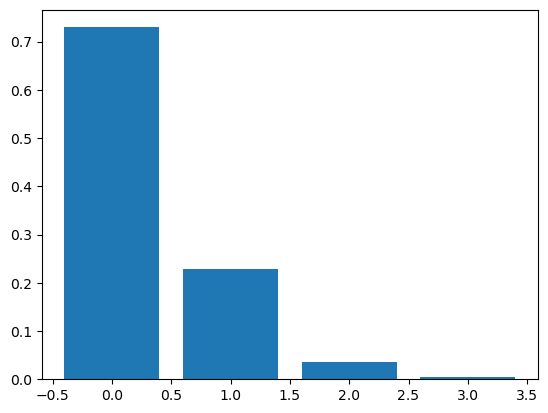

In [6]:
#---------------------------------------- PCA (feature selection) ------------------------------------------------------
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca=PCA()

pca.fit_transform(x)

print(pca.explained_variance_ratio_)
plt.bar(range(pca.explained_variance_ratio_.size),pca.explained_variance_ratio_)

plt.show()
#Based on the diagram below, we can see that about 99.5% of the samples can be assigned with 3 features.

In [7]:
# ---------------------------------------- use PCA for select 3 good feature ----------------------------------------
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
print('original feature name is : ',str(x.shape[1]))
print('after PCA ,feature number is : ',str(x_pca.shape[1]))
#pca_feature_name=pca.get_feature_names_out(feature_name)
#print(pca_feature_name)

original feature name is :  4
after PCA ,feature number is :  3


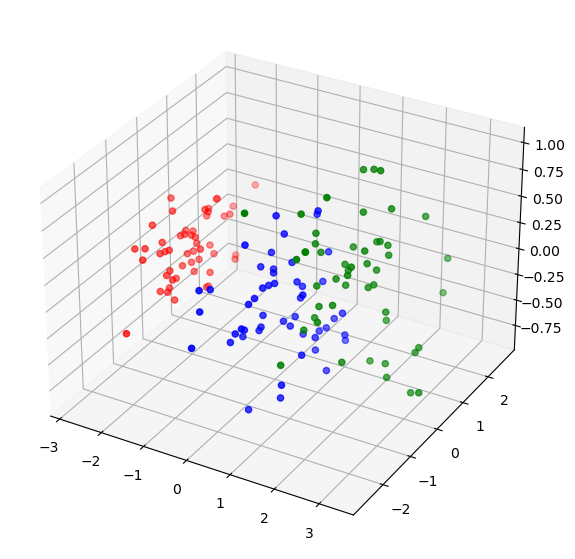

In [8]:
# ------------------------------------- show samples in 3D-space by 3 good feature -------------------------------------
from matplotlib.colors import ListedColormap

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(projection='3d')

colors = ListedColormap(['r','b','g'])
scatter=ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,cmap=colors)

#ax.legend(handles=scatter.legend_elements()[0],labels=class_name[0])

plt.show()

In [9]:
# -------------------------------------data partiton on x_pca to train and test set  -------------------------------------
print(x_pca.shape)

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x_pca,y,shuffle=True,test_size=0.25,random_state=42,stratify=y)

print('sample train size is : ',str(train_x.shape[0]))
print('sample test size is : ',str(test_x.shape[0]))

#print('target sample train size is : ',str(train_y.shape[0]))
#print('target sample test size is : ',str(test_y.shape[0]))


(150, 3)
sample train size is :  112
sample test size is :  38


In [10]:
#%%timeit 
# ----------------------------------------- use knn for classification -----------------------------------------

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(train_x,train_y)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predit_y=knn.predict(test_x)
result = confusion_matrix(test_y,predit_y)
print("Confusion Matrix:")
print(result)

report=classification_report(test_y,predit_y)
print("Classification Report:")
print (report)

acc=accuracy_score(test_y,predit_y)
print('accuracy is :',)
print(acc)

Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

accuracy is :
0.9473684210526315


[Text(0.5, 0.9166666666666666, 'x[0] <= -1.14\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.75, 'x[0] <= 1.258\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5, 0.5833333333333334, 'x[2] <= 0.41\ngini = 0.24\nsamples = 43\nvalue = [0, 37, 6]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= 1.108\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.375, 0.25, 'x[2] <= -0.276\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.4166666666666667, 'x[0] <= 0.849\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.75, 0.58

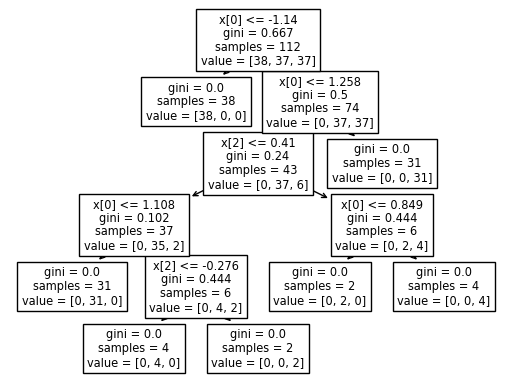

In [11]:
#%%timeit 
# ------------------------------------- use decision tree  for classification  ------------------------------------

from sklearn import tree

dt=tree.DecisionTreeClassifier()
dt.fit(train_x,train_y)

tree.plot_tree(dt)

In [12]:
#%%timeit
# ------------------------------------- use decision tree  for classification (test) ------------------------------------
predit_y=dt.predict(test_x)
result = confusion_matrix(test_y,predit_y)
print("Confusion Matrix:")
print(result)

report=classification_report(test_y,predit_y)
print("Classification Report:")
print (report)

acc=accuracy_score(test_y,predit_y)
print('accuracy is :',)
print(acc)

Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

accuracy is :
0.9210526315789473


In [13]:
#%%timeit 
# ----------------------------------- use SVC (quadratic) for classification -----------------------------------
from sklearn import svm

svm_q=svm.SVC()
svm_q.fit(train_x,train_y)

predit_y=svm_q.predict(test_x)
result = confusion_matrix(test_y,predit_y)
print("Confusion Matrix:")
print(result)

report=classification_report(test_y,predit_y)
print("Classification Report:")
print (report)

acc=accuracy_score(test_y,predit_y)
print('accuracy is :',)
print(acc)

Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

accuracy is :
0.9210526315789473


In [14]:
#%%timeit 
# ----------------------------------- use naive bayes for classification -----------------------------------

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(train_x,train_y)

predit_y=gnb.predict(test_x)
result = confusion_matrix(test_y,predit_y)
print("Confusion Matrix:")
print(result)

report=classification_report(test_y,predit_y)
print("Classification Report:")
print (report)

acc=accuracy_score(test_y,predit_y)
print('accuracy is :',)
print(acc)

Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

accuracy is :
0.8947368421052632
